In [37]:
# Install necessary libraries if needed
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")
}
if (!requireNamespace("avocado", quietly = TRUE)) {
  install.packages("avocado")
}
if (!requireNamespace("zoo", quietly = TRUE)) {
  install.packages("zoo")
}
if (!requireNamespace("treemap", quietly = TRUE)) {
  install.packages("treemap")
}

# Load necessary packages
library(tidyverse)
library(avocado)
library(zoo)
library(treemap)

# Load iris dataset
data(iris)

In [38]:
# Inspect dataset
str(iris)
View(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [39]:
# Create a Dataframe Grouped by Species with Average Petal Length
species_petal_length = iris %>%
  group_by(Species) %>%
  summarise(mean_petal_length = mean(Petal.Length))


species_petal_length

Species,mean_petal_length
<fct>,<dbl>
setosa,1.462
versicolor,4.260
virginica,5.552


In [46]:
# Create a Bar Char 
# Using geom_bar(state="identity") x=Species, y=Average Petal Length
ggplot(species_petal_length, aes(x=Species, y=mean_petal_length)) +
  geom_bar(fill="#5858b8") +
  labs(title="Average Petal Length by Species"
        ,x = "Species"
        ,y = "Average Petal Length")
    theme_minimal()




ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing stat.
i Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_count()` must only have an x or y aesthetic.

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mim

List of 136
 $ line                            :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                            :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                            :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: l

In [41]:
# Create a Dataframe for species count
# Group the iris dataset by the species column and calculate the count for each species

count_irises <- iris %>%
  group_by(Species) %>%
  summarise(count = n())

count_irises

Species,count
<fct>,<int>
setosa,50
versicolor,50
virginica,50


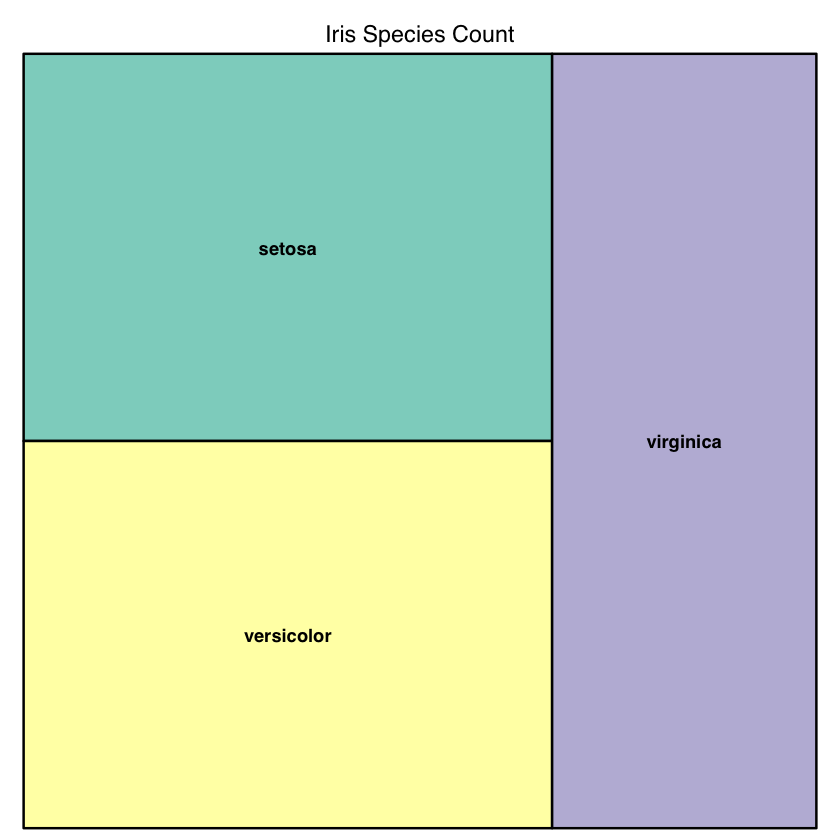

In [42]:
treemap(count_irises,
        index="Species",
        vSize="count",
        title="Iris Species Count",
        palette = "Set3",
        border.col = "black"
)

In [43]:
# Create a new variable SepalWidthCategory to categorize Sepal.Width into 3 categories low medium high

iris <- iris %>%
    mutate(SepalWidthCategory = case_when(
        Sepal.Width < 3.0 ~ "low",
        Sepal.Width >= 3 & Sepal.Width < 3.5 ~ "medium",
        Sepal.Width >= 3.5 ~ "high"
    ))

iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,SepalWidthCategory
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
5.1,3.5,1.4,0.2,setosa,high
4.9,3.0,1.4,0.2,setosa,medium
4.7,3.2,1.3,0.2,setosa,medium
4.6,3.1,1.5,0.2,setosa,medium
5.0,3.6,1.4,0.2,setosa,high
5.4,3.9,1.7,0.4,setosa,high
4.6,3.4,1.4,0.3,setosa,medium
5.0,3.4,1.5,0.2,setosa,medium
4.4,2.9,1.4,0.2,setosa,low


In [44]:
# Create a Dataframe for Sepal Width Category Count
SepalWidthCategoryCount <- iris %>%
    group_by(Species, SepalWidthCategory) %>%
    summarise(count = n())

SepalWidthCategoryCount

`summarise()` has grouped output by 'Species'. You can override using the
`.groups` argument.


Species,SepalWidthCategory,count
<fct>,<chr>,<int>
setosa,high,22
setosa,low,2
setosa,medium,26
versicolor,low,34
versicolor,medium,16
virginica,high,3
virginica,low,21
virginica,medium,26


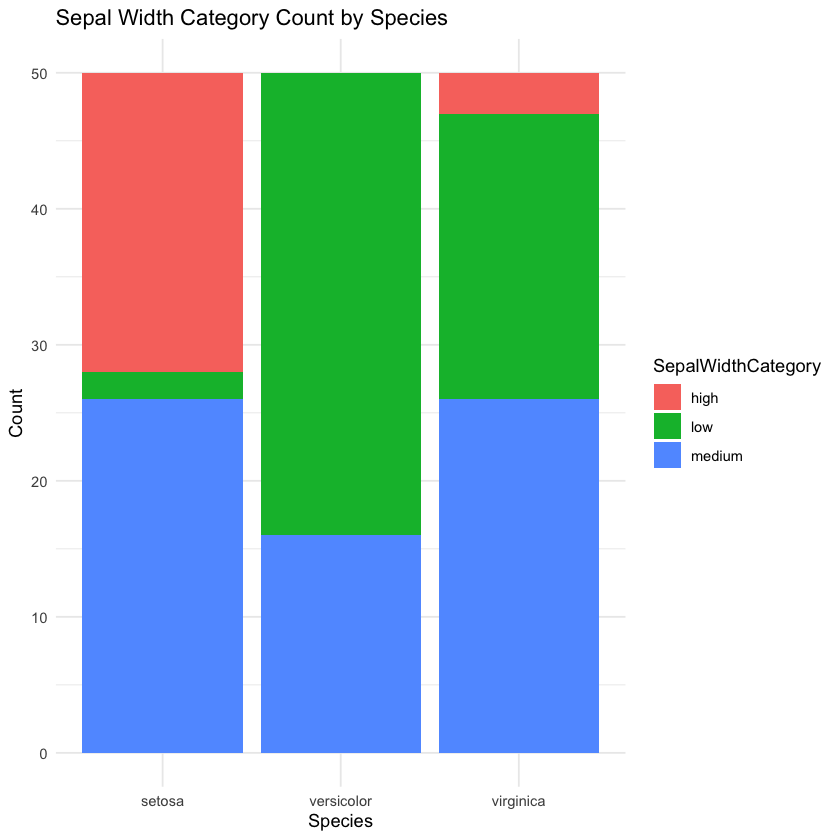

In [45]:
# Create stacked bar chart
ggplot(SepalWidthCategoryCount, aes(x=Species, y=count, fill=SepalWidthCategory)) +
    geom_bar(stat="identity", position="stack") +
    labs(title="Sepal Width Category Count by Species",
         x="Species",
         y="Count") +
    theme_minimal()
